## Observations and Insights

## Dependencies and starter code

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = combined_df.groupby('Drug Regimen')

tumor_vol_mean = regimen_df["Tumor Volume (mm3)"].mean()

tumor_vol_med =regimen_df["Tumor Volume (mm3)"].median()

tumor_vol_std= regimen_df["Tumor Volume (mm3)"].std()

tumor_vol_var = (tumor_vol_std)**2

tumor_sem = regimen_df["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({"Tumor Volume Mean": tumor_vol_mean,
                       "Tumor Volume Median": tumor_vol_med,
                       "Tumor Volume Variance": tumor_vol_var,
                       "Tumor Volume Standard Deviation": tumor_vol_std,
                       "Tumor Volume SEM": tumor_sem})

tumor_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

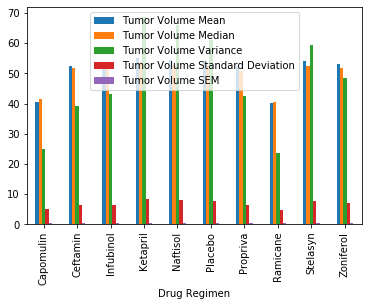

In [132]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_df.plot(kind="bar")
#tumor_df.set_ylabel("Tumor Volume (mm3)")


In [65]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
import numpy as np
tumor_x =  np.arange(len(tumor_df))
values = []



TypeError: 'DataFrame' object is not callable

In [133]:
plt.bar(tumor_x, )

TypeError: bar() missing 1 required positional argument: 'height'

# Pie plots

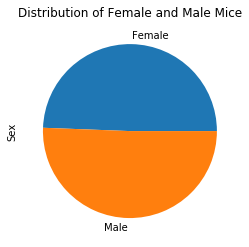

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = combined_df.groupby("Sex")

count= gender_df["Sex"].count()
count
count.plot(kind="pie", title = "Distribution of Female and Male Mice")



In [135]:
count

Sex
Female    935
Male      958
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1a1a27eaf28>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

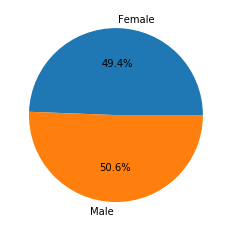

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = count["Male"]
female= count["Female"]

labels = ["Female", "Male"]
gendercount = [female,male]
#explode = (0.1, 0)

plt.pie(gendercount, labels = labels, autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#mouse_df = combined_df.groupby(['Mouse ID','Drug Regimen'])
regimen_df.head()

#Calculate the IQR and quantitatively determine if there are any potential outliers. 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen